# DATA SCIENCE

# TASK CODE : DS

# TASK - 03 : Build a Decision Tree Classifier

# Dataset : Bank-Marketing.csv

In [10]:
# IMPORT THE LIBRARIES
import pandas as pd# LOAD THE CSV FILE
df = pd.read_csv('Bank-Marketing.csv')
# SHOWING FIRST 5 ROWS FROM THE DATASETS
df.head()

,age,"""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [11]:
# BASIC INFO OF THE DATASETS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   "job"        45211 non-null  object
 2   "marital"    45211 non-null  object
 3   "education"  45211 non-null  object
 4   "default"    45211 non-null  object
 5   "balance"    45211 non-null  int64 
 6   "housing"    45211 non-null  object
 7   "loan"       45211 non-null  object
 8   "contact"    45211 non-null  object
 9   "day"        45211 non-null  int64 
 10  "month"      45211 non-null  object
 11  "duration"   45211 non-null  int64 
 12  "campaign"   45211 non-null  int64 
 13  "pdays"      45211 non-null  int64 
 14  "previous"   45211 non-null  int64 
 15  "poutcome"   45211 non-null  object
 16  "y"          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# CHECKING NULL VALUE
df.isnull().sum()

age            0
"job"          0
"marital"      0
"education"    0
"default"      0
"balance"      0
"housing"      0
"loan"         0
"contact"      0
"day"          0
"month"        0
"duration"     0
"campaign"     0
"pdays"        0
"previous"     0
"poutcome"     0
"y"            0
dtype: int64

# CLEAN DATA COLUMN LIKE REMOVING "" FROM TEXT 

In [13]:
# Remove quotes from column names
df.columns = df.columns.str.replace('"', '').str.strip()

# Remove quotes from string values in object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('"', '').str.strip()

# Show cleaned column names and a few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Split dataset : Train/Test split (70/30)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Encode target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

# Create preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='mean'), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Create pipeline with Decision Tree classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=False)


print("Accuracy : ",accuracy)
print("Classification Report : \n",report)

Accuracy :  0.8732721441999336
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.71      9043
weighted avg       0.87      0.87      0.87      9043



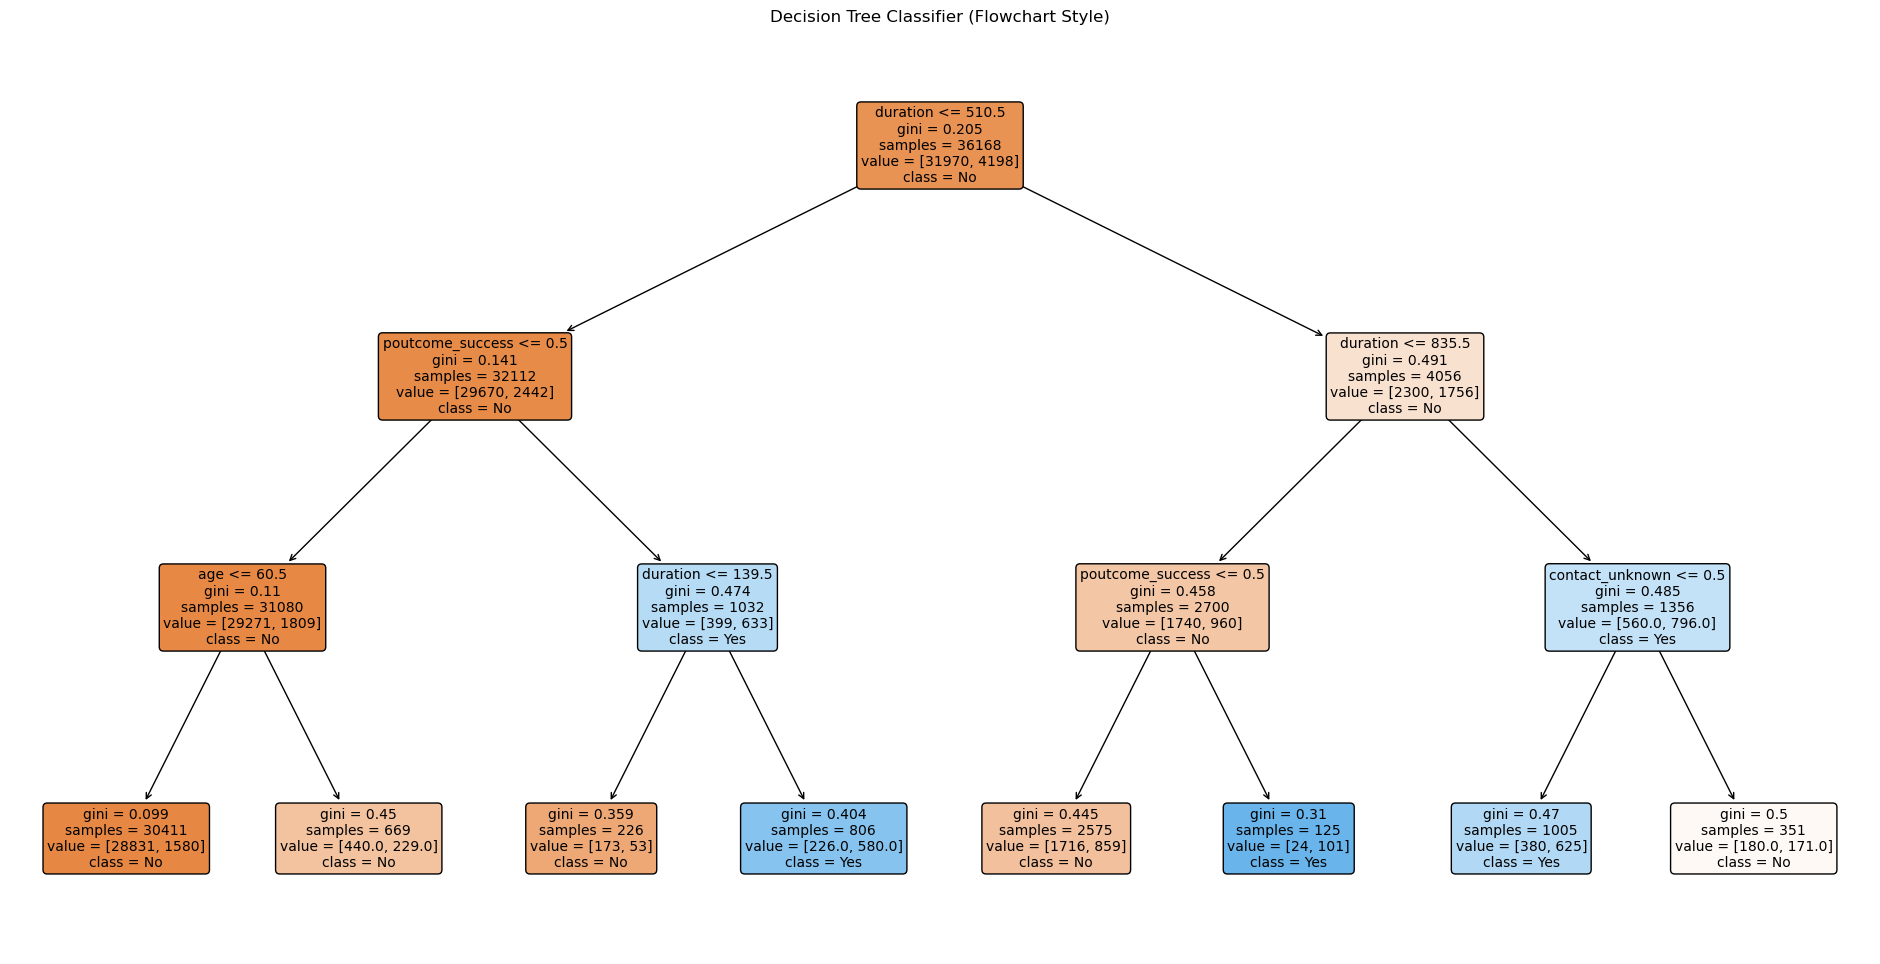

In [15]:
# Re-plot the decision tree like the diagram the user uploaded (custom flowchart style)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Re-plot the trained decision tree model
plt.figure(figsize=(24, 12))
plot_tree(model, 
          feature_names=all_features, 
          class_names=["No", "Yes"], 
          filled=True, 
          rounded=True, 
          fontsize=10, 
          max_depth=3)
plt.title("Decision Tree Classifier (Flowchart Style)")
plt.show()


# Conclusion

The model is better at finding non-buyers, Because from the dataset, 
we get Accuracy: 87%, 

That means it was right 87 out of 100 times, most people did not buy the product.

 - 90 people didn’t buy (label = 0)
 - 10 people did buy (label = 1)